In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Final/data/melon_hiphop_인기_스테디_가사.csv")
df.head()

,제목,가사,장르
0,우연히 봄,우연히 내게 오나봐\n봄 향기가 보여\n너도 같이 오나봐\n저 멀리서 니 향기가\n...,힙합
1,우산 (Feat. 윤하),어느새 빗물이\n내 발목에 고이고\n참았던 눈물이\n내 눈가에 고이고\nI cry\...,힙합
2,Y (Please Tell Me Why),My baby I love you so much\nforever you and I\...,힙합
3,어땠을까 (Feat. 박정현),내가 그때 널 잡았더라면\n너와 나 지금보다 행복했을까\n마지막에 널\n안아줬다면 ...,힙합
4,"헤어지지 못하는 여자, 떠나가지 못하는 남자 (Feat. 정인)",헤어지지 못하는 여자\n떠나가지 못하는 남자\n사랑하지 않는 우리 그래서\nNo n...,힙합


In [ ]:
df_bal = pd.read_csv("/content/drive/MyDrive/Final/data/melon_ballad_최신_가사.csv")
df_bal.head()

,제목,가사,장르
0,별자리,모두가 잠든 하루 끝\n차게 얼어붙은 길 위로\n무겁기만 한 작은 발걸음\n돌아가긴...,발라드
1,몫,생각도 못 해본거야\n마냥 행복했었던\n시간의 뒷모습을\n닫혀진 네 마음 앞에\n작...,발라드
2,좋아했어요 (Vocal 이서한),좋아했어요 비록\n알려줄 수 없었던\n맘이었지만 마음까진\n어떻게 맘대로 안되니\n...,발라드
3,비밀연애,너 정말 어떡하려고 그래\n그러다 사람들이 눈치챌 것 같아\n그렇게 비밀로 하자 해...,발라드
4,크리스마스가 다가와,Christmas is almost here\nIf I hold your hand\...,발라드


In [ ]:
lyrics = df["가사"]
lyrics_bal = df_bal["가사"]

In [ ]:
lyrics = lyrics.str.lower()
lyrics

0        우연히 내게 오나봐\n봄 향기가 보여\n너도 같이 오나봐\n저 멀리서 니 향기가\n...
1        어느새 빗물이\n내 발목에 고이고\n참았던 눈물이\n내 눈가에 고이고\ni cry\...
2        my baby i love you so much\nforever you and i\...
3        내가 그때 널 잡았더라면\n너와 나 지금보다 행복했을까\n마지막에 널\n안아줬다면 ...
4        헤어지지 못하는 여자\n떠나가지 못하는 남자\n사랑하지 않는 우리 그래서\nno n...
                               ...                        
10385    저 멀리 희미하게\n반짝이는 빛이 보이네\n난 어둠을 피하려는 하루살이\n그 빛을 ...
10386    double s oh\ndouble s oh\ndouble s oh\nya ya y...
10387    아직도 내겐 눈물이 많아서\n니 사진 다시\n꺼내지도 못해 난\n세상엔 니가 없는걸...
10388    꿈이 아니길 바랬어 oh\n그녀가 내게 말했어\n꿈이 아니길 바랬어\n어지러운 불빛...
10389    그대만이 그대니라\n\nuh yeah 그대는 어디 uh yeah 난 지금 여기\nu...
Name: 가사, Length: 10390, dtype: object

In [ ]:
lyrics_bal = lyrics_bal.str.lower()

In [ ]:
# 개행 문자 제거
lyrics = lyrics.map(lambda x: re.sub("\n+", " ", x))
lyrics

0        우연히 내게 오나봐 봄 향기가 보여 너도 같이 오나봐 저 멀리서 니 향기가 설레는 ...
1        어느새 빗물이 내 발목에 고이고 참았던 눈물이 내 눈가에 고이고 i cry 텅빈 방...
2        my baby i love you so much forever you and i i...
3        내가 그때 널 잡았더라면 너와 나 지금보다 행복했을까 마지막에 널 안아줬다면 어땠을...
4        헤어지지 못하는 여자 떠나가지 못하는 남자 사랑하지 않는 우리 그래서 no no n...
                               ...                        
10385    저 멀리 희미하게 반짝이는 빛이 보이네 난 어둠을 피하려는 하루살이 그 빛을 원해 ...
10386    double s oh double s oh double s oh ya ya ya d...
10387    아직도 내겐 눈물이 많아서 니 사진 다시 꺼내지도 못해 난 세상엔 니가 없는걸 알면...
10388    꿈이 아니길 바랬어 oh 그녀가 내게 말했어 꿈이 아니길 바랬어 어지러운 불빛 아래...
10389    그대만이 그대니라 uh yeah 그대는 어디 uh yeah 난 지금 여기 uh ye...
Name: 가사, Length: 10390, dtype: object

In [ ]:
lyrics_bal = lyrics_bal.map(lambda x: re.sub("\n+", " ", x))

In [ ]:
# 여러 개의 공백을 하나로
lyrics.map(lambda x: re.sub("[\s]+", " ", x))
lyrics

0        우연히 내게 오나봐 봄 향기가 보여 너도 같이 오나봐 저 멀리서 니 향기가 설레는 ...
1        어느새 빗물이 내 발목에 고이고 참았던 눈물이 내 눈가에 고이고 i cry 텅빈 방...
2        my baby i love you so much forever you and i i...
3        내가 그때 널 잡았더라면 너와 나 지금보다 행복했을까 마지막에 널 안아줬다면 어땠을...
4        헤어지지 못하는 여자 떠나가지 못하는 남자 사랑하지 않는 우리 그래서 no no n...
                               ...                        
10385    저 멀리 희미하게 반짝이는 빛이 보이네 난 어둠을 피하려는 하루살이 그 빛을 원해 ...
10386    double s oh double s oh double s oh ya ya ya d...
10387    아직도 내겐 눈물이 많아서 니 사진 다시 꺼내지도 못해 난 세상엔 니가 없는걸 알면...
10388    꿈이 아니길 바랬어 oh 그녀가 내게 말했어 꿈이 아니길 바랬어 어지러운 불빛 아래...
10389    그대만이 그대니라 uh yeah 그대는 어디 uh yeah 난 지금 여기 uh ye...
Name: 가사, Length: 10390, dtype: object

In [ ]:
lyrics_bal.map(lambda x: re.sub("[\s]+", " ", x))

# Konlpy

In [ ]:
# !pip install konlpy

In [ ]:
from konlpy.tag import Okt

tokenizer = Okt()

In [ ]:
lyrics.head()

0    우연히 내게 오나봐 봄 향기가 보여 너도 같이 오나봐 저 멀리서 니 향기가 설레는 ...
1    어느새 빗물이 내 발목에 고이고 참았던 눈물이 내 눈가에 고이고 i cry 텅빈 방...
2    my baby i love you so much forever you and i i...
3    내가 그때 널 잡았더라면 너와 나 지금보다 행복했을까 마지막에 널 안아줬다면 어땠을...
4    헤어지지 못하는 여자 떠나가지 못하는 남자 사랑하지 않는 우리 그래서 no no n...
Name: 가사, dtype: object

In [ ]:
a = lyrics.head(1000).tolist()

In [ ]:
a_bal = lyrics_bal.head(1000).tolist()

In [ ]:
b = ' '.join(a)

In [ ]:
b_bal = " ".join(a_bal)

In [ ]:
lyrics_pos = tokenizer.pos(b)

In [ ]:
lyrics_pos_bal = tokenizer.pos(b_bal)

In [ ]:
word_list = []

for val, pumsa in lyrics_pos:
    if (len(val) > 1) and (pumsa in ("Noun", "Alpha")):
        word_list.append(val)

In [ ]:
word_list

In [ ]:
word_list_bal = []

for val, pumsa in lyrics_pos_bal:
    if (len(val) > 1) and (pumsa in ("Noun", "Alpha")):
        word_list_bal.append(val)

In [ ]:
def word_cloud(lyrics_data, width=1200, height=500):
    # series_lyrics = lyrics_data
    
    # # 전처리
    # series_lyrics = series_lyrics.map(preprocessiong_for_word_cloud)

    # # 명사만 추출
    # noun_list = series_lyrics.map(noun)

    # # 가사 문자열로 변환
    data = " ".join(lyrics_data)

    # word cloud 그리기
    word_draw = WordCloud(
        font_path='/content/drive/MyDrive/Final/AppleSDGothicNeo.ttc',
        width=width, height=height,
        # stopwords=["합니다", "입니다"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()   

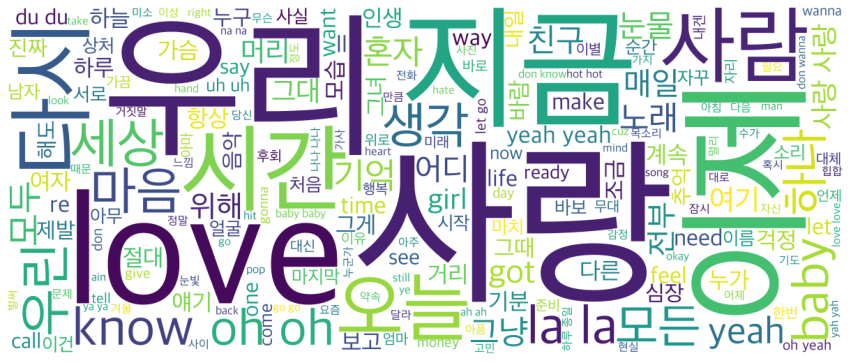

In [ ]:
word_cloud(word_list)

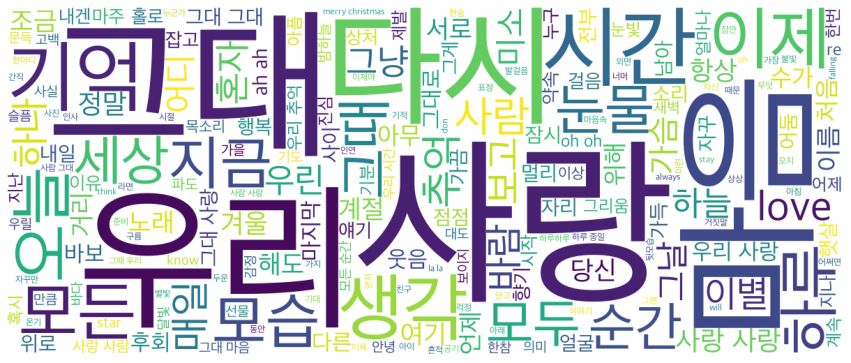

In [ ]:
word_cloud(word_list_bal)

In [ ]:
from collections import Counter

In [ ]:
# 힙합 1000곡 단어 개수
counts = Counter(word_list)
tags = counts.most_common(50)
len(counts)

13513

In [ ]:
# 발라드 1000곡 단어 개수
counts_bal = Counter(word_list_bal)
tags_bal = counts_bal.most_common(50)
len(counts_bal)

3662

In [ ]:
key_l = set(counts.keys()) - set(counts_bal.keys())

In [ ]:
only_hip_key = {}

for key in key_l:
    only_hip_key[key] = counts[key]

In [ ]:
counts_only_pop = Counter(only_hip_key)
tag_temp = counts_only_pop.most_common(50)

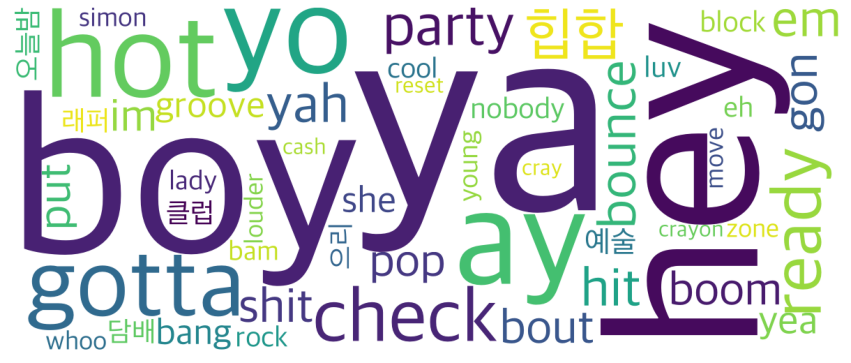

In [ ]:
word_draw = WordCloud(
        font_path='/content/drive/MyDrive/Final/AppleSDGothicNeo.ttc',
        width=1200, height=500, 
        background_color="white",
        random_state=42
    )
word_draw.generate_from_frequencies(dict(tag_temp))
plt.figure(figsize=(15, 7))
plt.imshow(word_draw)
plt.axis("off")
plt.show() 

In [ ]:
stop_words = ["oh", "yeah"]

In [ ]:
df_bal = pd.DataFrame(counts_bal.values(), index=counts_bal.keys())
df_bal.head()

,0
모두,256
하루,380
위로,93
발걸음,38
멀리,126


In [ ]:
df_bal.loc[stop_words, :]

,0
oh,190
yeah,24


In [ ]:
df_pop = pd.DataFrame(counts.values(), index=counts.keys())
df_pop.head()

,0
향기,91
멀리,251
코끝,10
입술,107
느낌,157


In [ ]:
df_pop.loc[stop_words, :]

,0
oh,1414
yeah,1157


In [ ]:
sns.countplot(df_pop.loc[stop_words, :])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: ignored